In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-89.58434233382026 -55.64234589003743
-33.04016605101234 118.38943876457574
48.65597689066283 -93.88506675341254
-53.29549156552431 142.28096993189604
-11.573589009683701 -162.83966669980538
75.91601059536796 -45.36514898559085
-60.44624405560226 -29.11695098602479
-15.00054784993091 -71.19822216099824
-78.62669540576904 -87.15889966130942
18.436621091408483 -127.62952889024915
-58.102778233340175 175.5447623302341
70.75445487138839 110.31813663681834
18.423950618578743 -46.692692181853374
58.01910240459222 21.87468457575079
56.133827186657726 120.17751671073876
54.39180840508354 -83.97856632042459
58.713808488154456 -10.268332745625258
63.09269194109618 169.76252938485845
46.04403966703484 -76.8087120465753
67.21979415938179 131.65627673853874
85.04377183193989 -116.86540141361712
25.684876299904957 79.02082998525498
42.1380721343244 14.47926020779721
-59.93847112516318 -93.2228198215861
31.099581981211855 122.30578145660087
36.921677332270235 -42.210957339896254
83.25965143913882 55.

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | fort frances
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | samusu
City not found. Skipping...
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | ayaviri
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | bathsheba
Processing Record 14 of Set 1 | salme
Processing Record 15 of Set 1 | khani
Processing Record 16 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 1 | stornoway
Processing Record 18 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 19 of Set 1 | pembroke
Processing Record 20 of Set 1 | batagay-alyta
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | moth
Proce

Processing Record 40 of Set 4 | mariental
Processing Record 41 of Set 4 | santa rosa
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | kodino
Processing Record 44 of Set 4 | sragen
Processing Record 45 of Set 4 | ashqelon
Processing Record 46 of Set 4 | lompoc
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | ambulu
Processing Record 49 of Set 4 | lavrentiya
Processing Record 50 of Set 4 | selfoss
Processing Record 1 of Set 5 | guatire
Processing Record 2 of Set 5 | kalianget
Processing Record 3 of Set 5 | ambilobe
Processing Record 4 of Set 5 | tabuk
Processing Record 5 of Set 5 | north platte
Processing Record 6 of Set 5 | luoyang
Processing Record 7 of Set 5 | ilave
Processing Record 8 of Set 5 | arman
Processing Record 9 of Set 5 | mount gambier
Processing Record 10 of Set 5 | turukhansk
Processing Record 11 of Set 5 | sibolga
Processing Record 12 of Set 5 | port keats
Processing Record 13 of Set 5 | qabis
City not found. Skipping...
P

Processing Record 30 of Set 8 | jiddah
City not found. Skipping...
Processing Record 31 of Set 8 | maraba
Processing Record 32 of Set 8 | guilin
Processing Record 33 of Set 8 | kuminskiy
Processing Record 34 of Set 8 | ayan
Processing Record 35 of Set 8 | tignere
Processing Record 36 of Set 8 | sedlcany
Processing Record 37 of Set 8 | margate
Processing Record 38 of Set 8 | cabo san lucas
Processing Record 39 of Set 8 | okoritofulpos
Processing Record 40 of Set 8 | sungaipenuh
Processing Record 41 of Set 8 | el alto
Processing Record 42 of Set 8 | sisimiut
Processing Record 43 of Set 8 | iracoubo
Processing Record 44 of Set 8 | vila velha
Processing Record 45 of Set 8 | payo
Processing Record 46 of Set 8 | amursk
Processing Record 47 of Set 8 | xining
Processing Record 48 of Set 8 | madimba
Processing Record 49 of Set 8 | araouane
Processing Record 50 of Set 8 | iquique
Processing Record 1 of Set 9 | winnemucca
Processing Record 2 of Set 9 | mangaratiba
Processing Record 3 of Set 9 | p

Processing Record 20 of Set 12 | tomatlan
Processing Record 21 of Set 12 | canatlan
Processing Record 22 of Set 12 | utiroa
City not found. Skipping...
Processing Record 23 of Set 12 | karatuzskoye
Processing Record 24 of Set 12 | morozovsk
Processing Record 25 of Set 12 | matay
Processing Record 26 of Set 12 | cananeia
Processing Record 27 of Set 12 | tres arroyos
Processing Record 28 of Set 12 | boende
Processing Record 29 of Set 12 | andros town
Processing Record 30 of Set 12 | amapa
Processing Record 31 of Set 12 | henties bay
Processing Record 32 of Set 12 | loukhi
Processing Record 33 of Set 12 | akyab
Processing Record 34 of Set 12 | launceston
Processing Record 35 of Set 12 | beloha
Processing Record 36 of Set 12 | mlonggo
Processing Record 37 of Set 12 | hambantota
Processing Record 38 of Set 12 | tigil
Processing Record 39 of Set 12 | ulaanbaatar
Processing Record 40 of Set 12 | darab
Processing Record 41 of Set 12 | bagan
Processing Record 42 of Set 12 | goroka
Processing Re

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,49.62,66,75,24.16,AR,2022-11-29 17:26:26
1,Albany,42.6001,-73.9662,38.03,68,77,2.24,US,2022-11-29 17:24:21
2,Fort Frances,48.5999,-93.4003,21.16,76,20,10.36,CA,2022-11-29 17:26:26
3,New Norfolk,-42.7826,147.0587,51.30,63,100,1.99,AU,2022-11-29 17:26:27
4,Ilulissat,69.2167,-51.1000,12.49,77,97,5.30,GL,2022-11-29 17:26:28
5,Chuy,-33.6971,-53.4616,79.30,53,0,13.56,UY,2022-11-29 17:26:28
6,Ayaviri,-14.8864,-70.5889,61.57,17,99,2.77,PE,2022-11-29 17:26:29
7,Punta Arenas,-53.1500,-70.9167,50.11,53,75,26.46,CL,2022-11-29 17:26:29
8,Guerrero Negro,27.9769,-114.0611,64.78,59,49,15.26,MX,2022-11-29 17:22:00
9,Kaitangata,-46.2817,169.8464,51.82,96,100,3.76,NZ,2022-11-29 17:26:30


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/29/22'

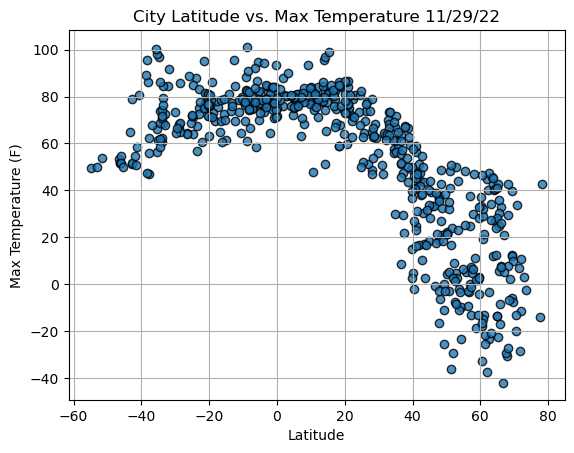

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

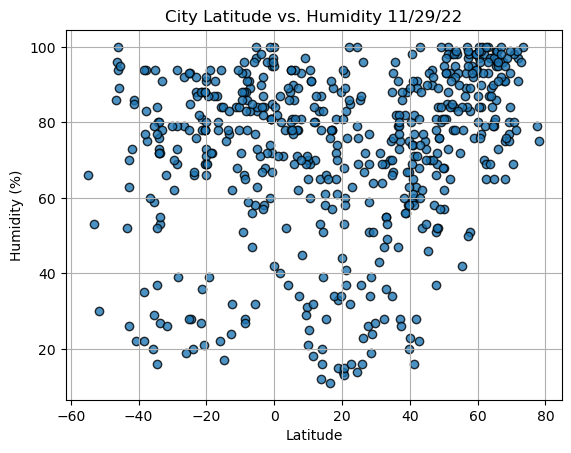

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

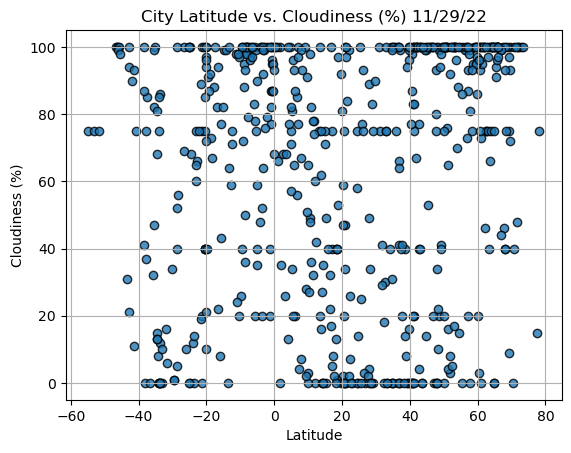

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

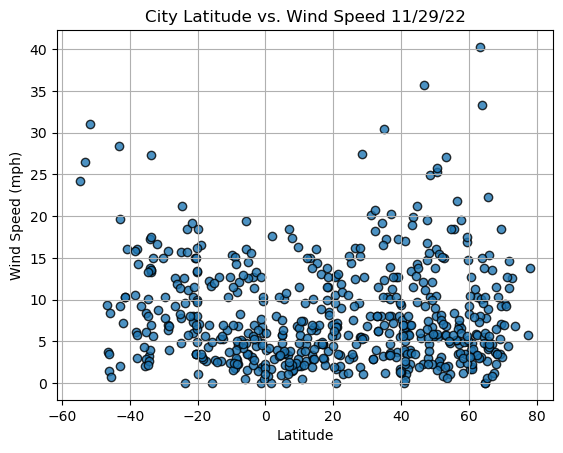

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

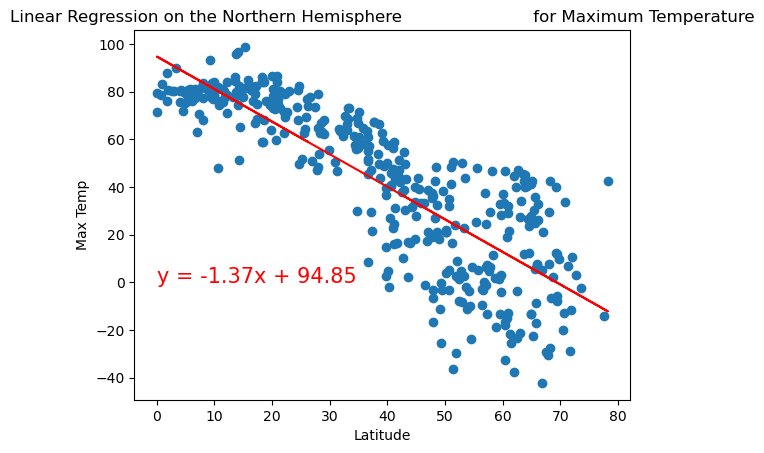

In [36]:
# Linear regression on the Northern Hemisphere - Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,0))

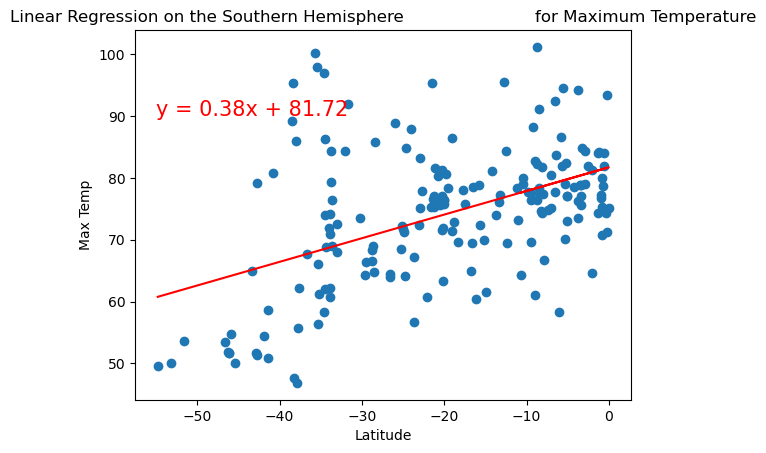

In [39]:
# Linear regression on the Southern Hemisphere - Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))

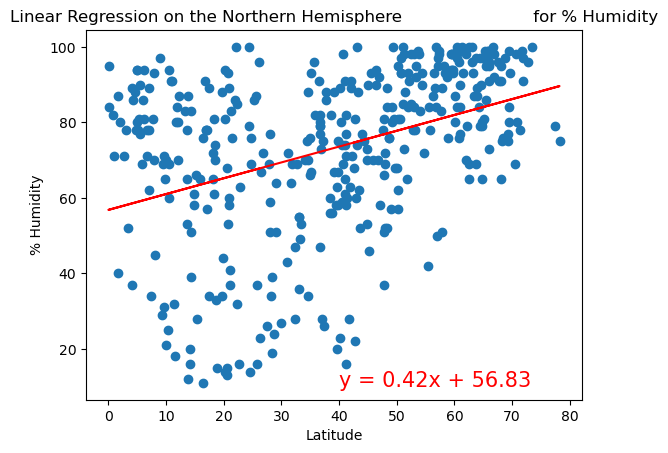

In [40]:
# Linear regression on the Northern Hemisphere - Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

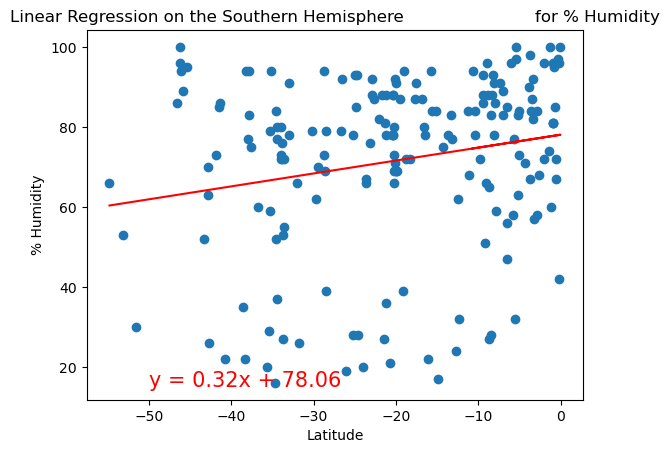

In [41]:
# Linear regression on the Southern Hemisphere - Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

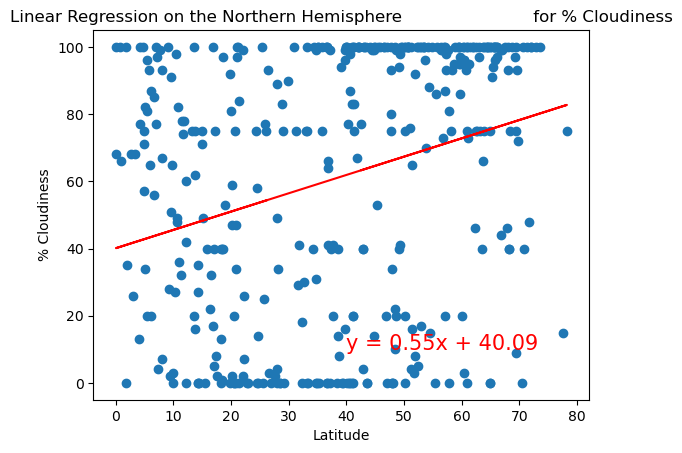

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

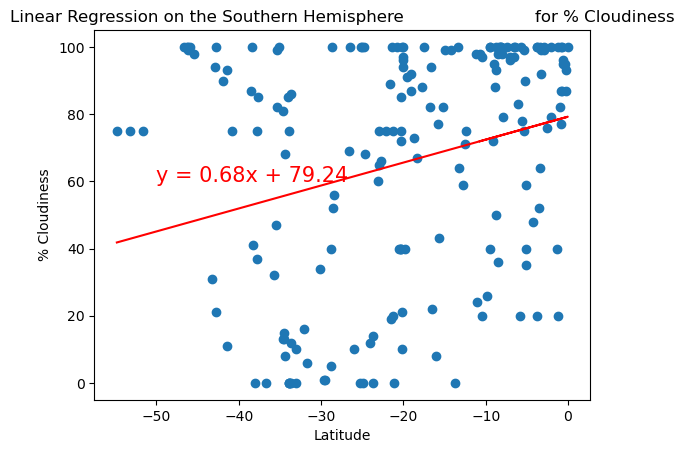

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

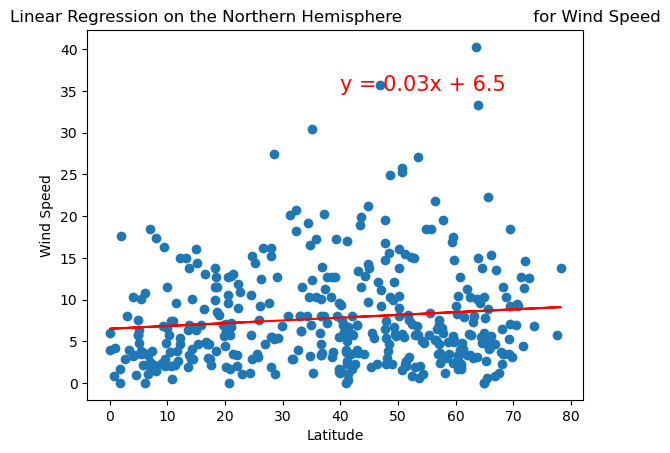

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

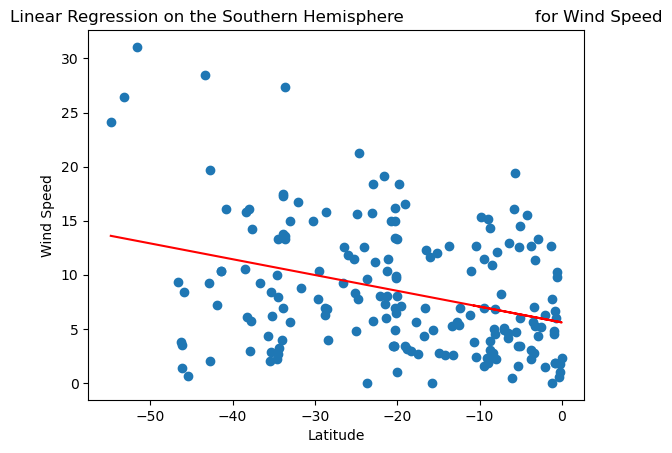

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))